Julian Hayes

Applied Time Series Analysis Final Project

May 2021

# Feeling Heard

A study of how the physical elements of sound correspond with its emotional perception

## Introduction

The ability to record music is a fairly recent invention. For millenia, the only way to experience music was to hear it live, whether in a church or a concert hall. That changed in the latter half of the 19th Century, with the first successful audio recording being performed in the 1850's by a French printer named Édouard-Léon Scott, although technology to actually hear recorded sound was not developed for another 20 years when Alexander Graham Bell and Thomas Edison deubted their telephone and phonograph, respectively (Fabry, 2018). As technology rapidly advanced over the next several decades, within 100 years of the first successful attempts to record sound people could own and play their own copies of recorded music on vinyl records. One the market for commercial music was established, technology to record and play music took off until eventually the world reached the era of streaming music from personal cellular devices and computers. With the ability to play any song whenever we want, we are living through an unprecedented era of musical accessibility and freedom. So what do people do with these opportunities? They make playlists full of songs that make them feel sad, of course.

One of the most popular ways to build playlists on streaming services like Spotify and Apple Music is to sort songs by the mood or feeling that they elicit. This association of music with feelings is not a new phenomenon– composers have been using music to prompt listeners to feel certain ways in film and theater forever. As a psychology student with a keen interest in music, this makes me wonder about how the associations between sound and feeling really work. As a data science student, I have the opportunity to find out for myself in this project.

The goal of this project is to take simple music files from online that have been labeled with some sort of feeling and break that audio down to examine its physical attributes and try to identify patterns in what songs are labeled as what moods, with the end goal of being able to apply these labels via a machine learning algorithm. For the purposes of this class, this algorithm will not be developed here, but it is a possibility for future application of this research. In fact, a similar algorithm already exists: Spotify uses an algorithm to track listening behavior in its users and target them with ads based on the kind of mood it thinks they are in (Peterson, 2015). Ethical issues aside, I think this concept has a lot of potential for a future project.

I do not have a hypothesis for this project. I do have some small predictions, however. I expect that songs considered to be happy are, on average, going to have higher frequencies than songs considered to be sad due to higher tempos. I also expect sad songs to have lower amplitudes than their happy counterparts.

## Methods

The code for this process comes from the notebook provided by Professor Davis, with apporpriate modifications to fit this project. The primary R package is tuneR.

In [1]:
install.packages("tuneR", dependencies = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘pastecs’




In [26]:
library("tuneR")

The first song we will look at is a song that I found by searching "happy" on Soundcloud, and has tags such as "happy" and "cheerful." This song is "Childrens Picnic" by WM Music.

In [34]:
mp3_url <- "https://raw.githubusercontent.com/ds-wm/atsa-2021/main/project/childrens-picnic.mp3"
mp3_file <- "/tmp/picnic.mp3"
download.file(
  url = mp3_url, 
  destfile = mp3_file, 
  method = "auto")

In [35]:
happy <- readMP3(mp3_file)
str(happy)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:7170048] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:7170048] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [59]:
max(happy@left)

[1] 32617

We can see that this song has 7,170,048 samples that max out at 32,617.

In [36]:
# Check audio length (convert seconds to minutes)
happy_samples <- length(happy@left)
happy_samples / happy@samp.rate / 60

[1] 2.709769

In [49]:
# Left channel
s1 <- happy@left
# Convert values to float
m1 <- s1 / 2^(happy@bit - 1)

In [38]:
happy_time <- (0:(happy_samples - 1)) / happy@samp.rate

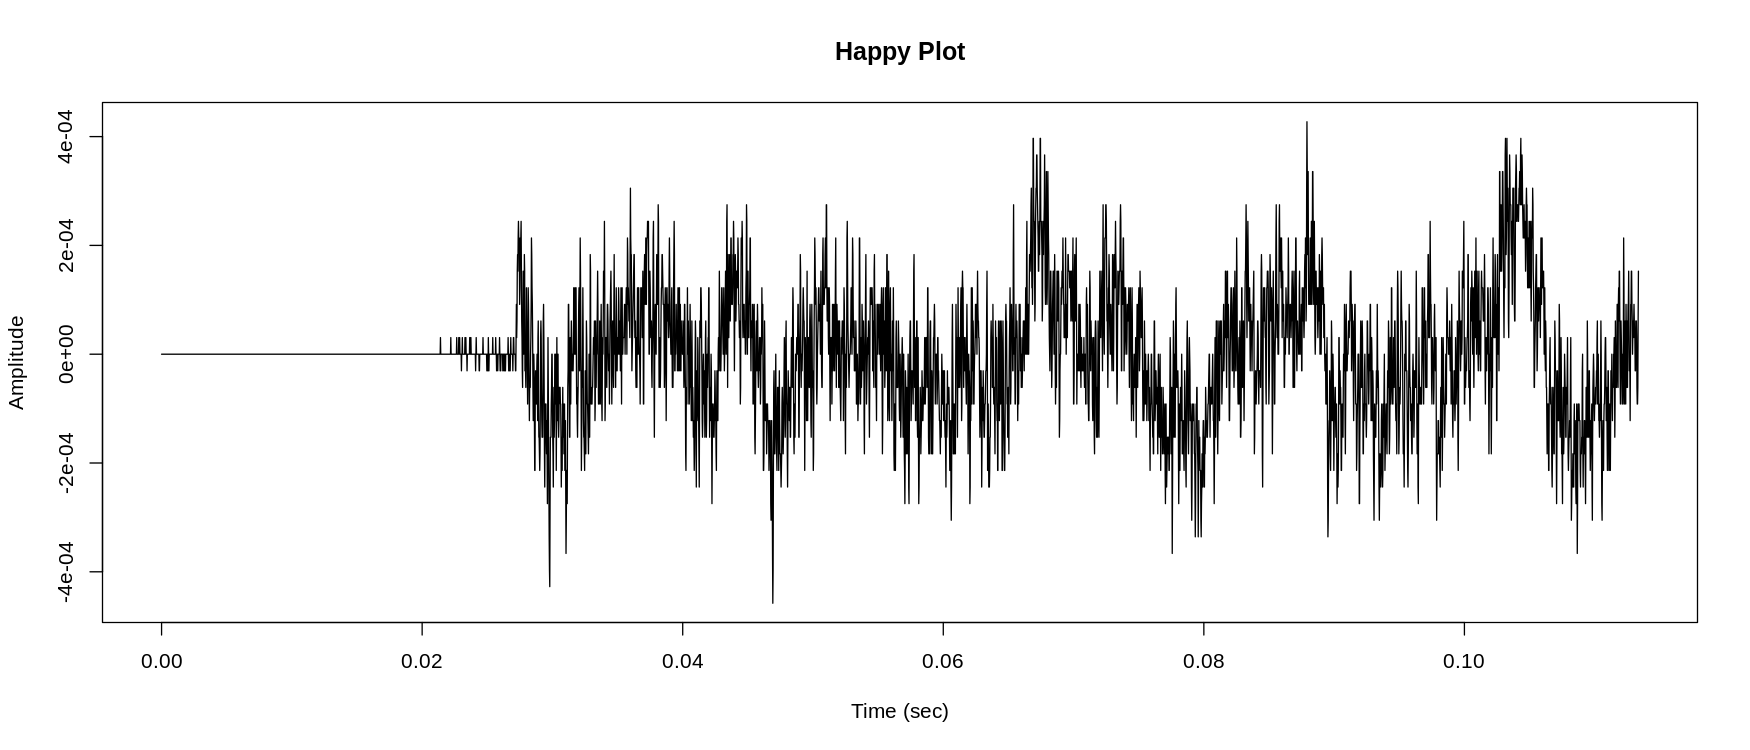

In [53]:
# Plotting some samples– far too many to do them all
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(happy_time[1:5000], m1[1:5000], type='l', col='black', 
     xlab='Time (sec)', ylab='Amplitude', main='Happy Plot')

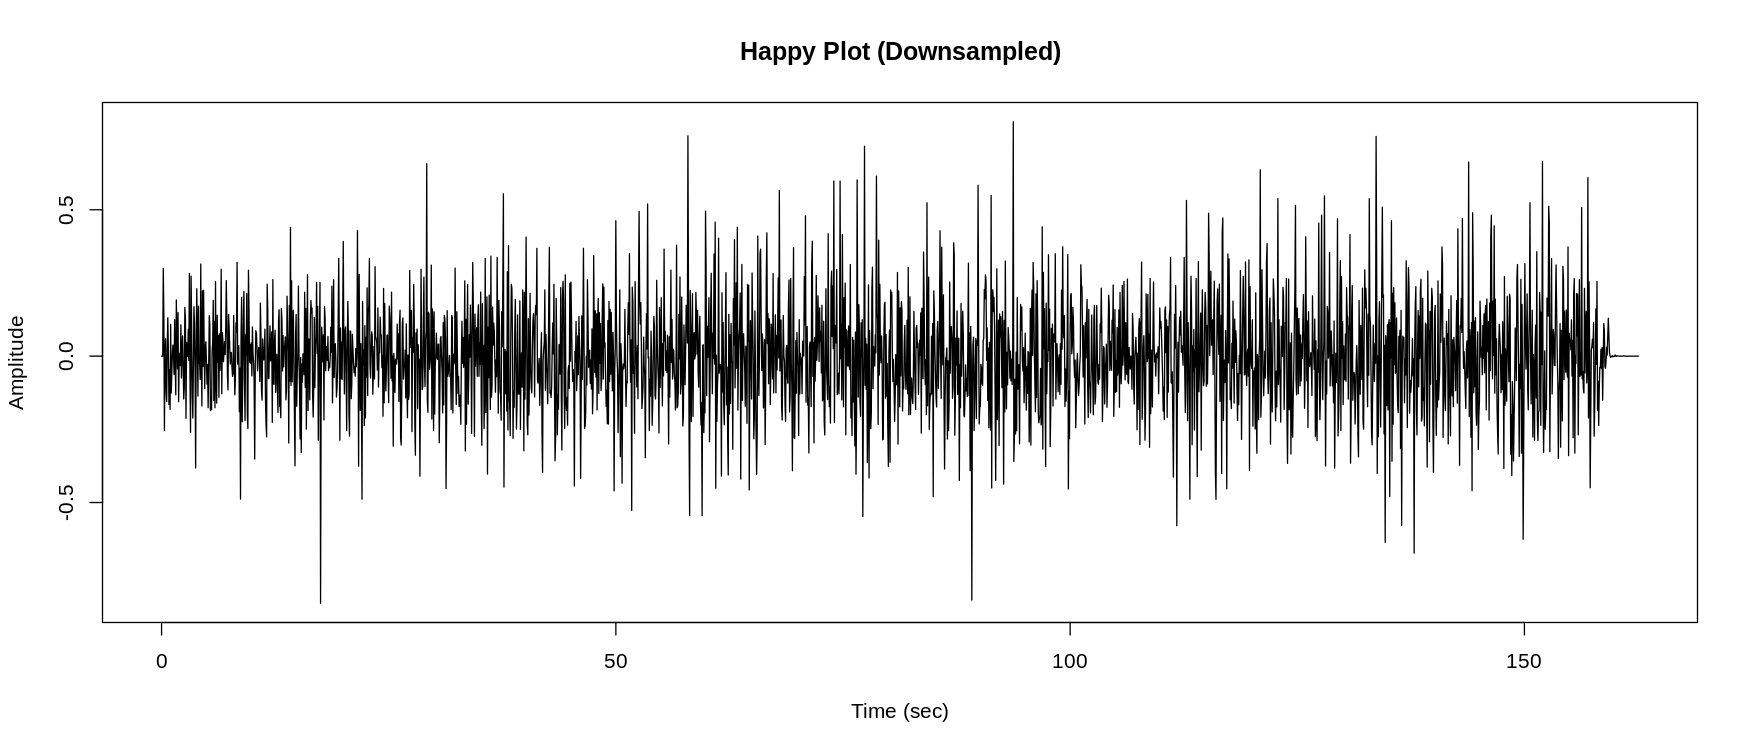

In [52]:
# Downsampling
happy.indx <- seq(1, (happy_samples - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(happy_time[happy.indx], m1[happy.indx], type='l', col='black', 
     xlab='Time (sec)', ylab='Amplitude', main='Happy Plot (Downsampled)')

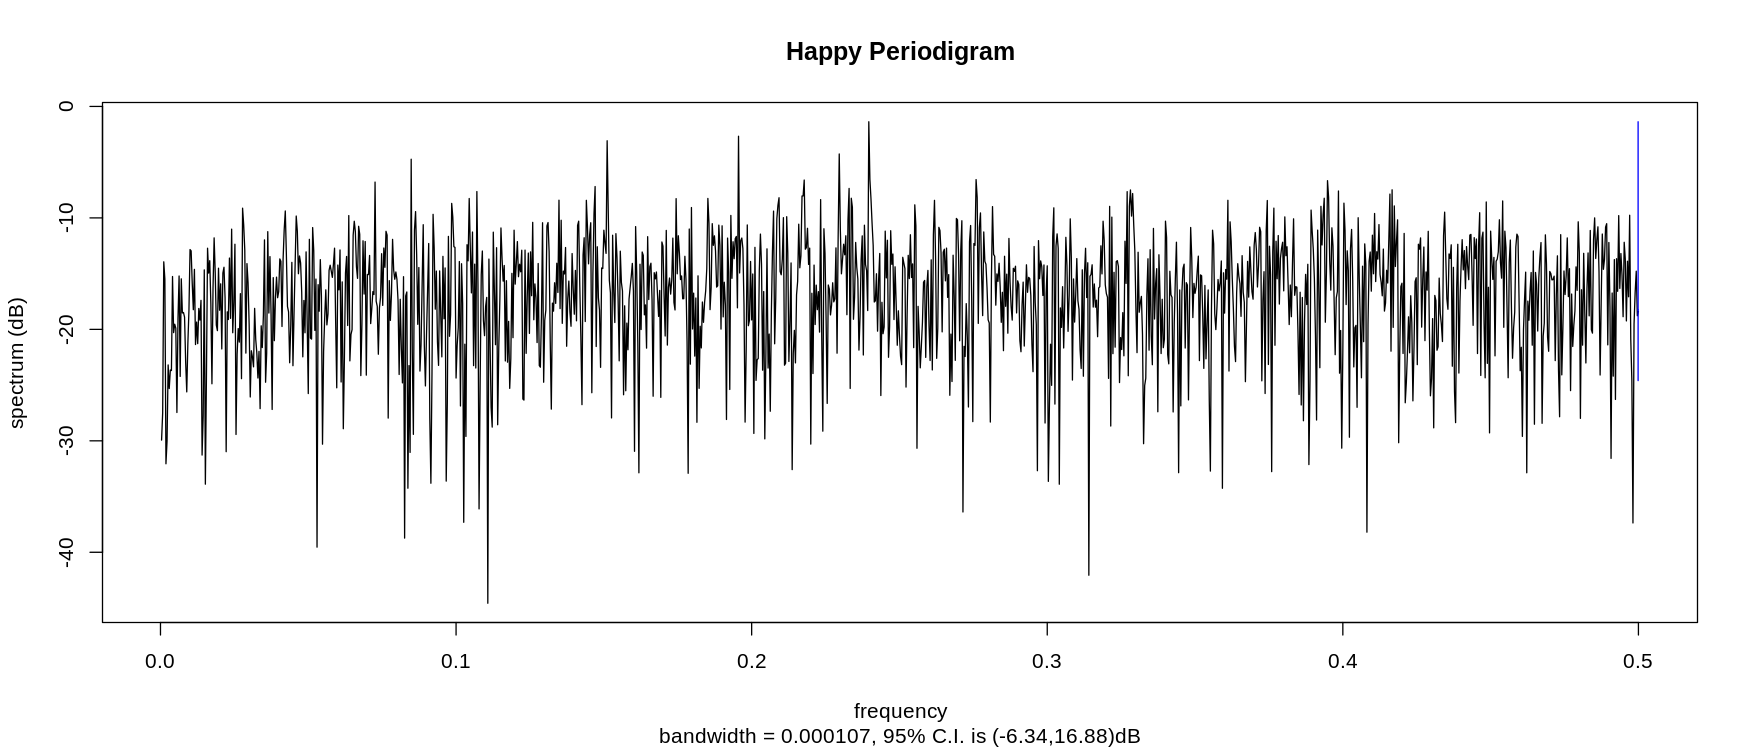

In [51]:
# Built-in R function
spectrum(m1[happy.indx], log="dB", main="Happy Periodigram")

The next song is designed to make people sad, and is aptly titled "Sad" by DJ T Huff on Soundcloud.

In [41]:
mp3_url <- "raw.githubusercontent.com/ds-wm/atsa-2021/main/project/sad.mp3"
mp3_file <- "/tmp/sad.mp3"
download.file(
  url = mp3_url, 
  destfile = mp3_file, 
  method = "auto")

In [42]:
sad <- readMP3(mp3_file)
str(sad)

Formal class 'Wave' [package "tuneR"] with 6 slots
  ..@ left     : int [1:7857792] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ right    : int [1:7857792] 0 0 0 0 0 0 0 0 0 0 ...
  ..@ stereo   : logi TRUE
  ..@ samp.rate: num 44100
  ..@ bit      : num 16
  ..@ pcm      : logi TRUE


In [58]:
max(sad@left)

[1] 32767

We can see that this song has 7,857,792 samples that max out at 32,767.

In [43]:
sad_samples <- length(sad@left)
sad_samples / sad@samp.rate / 60

[1] 2.969687

In [54]:
# Left channel
s1 <- sad@left
# Convert values to float
m1 <- s1 / 2^(sad@bit - 1)

In [46]:
sad_time <- (0:(sad_samples - 1)) / sad@samp.rate

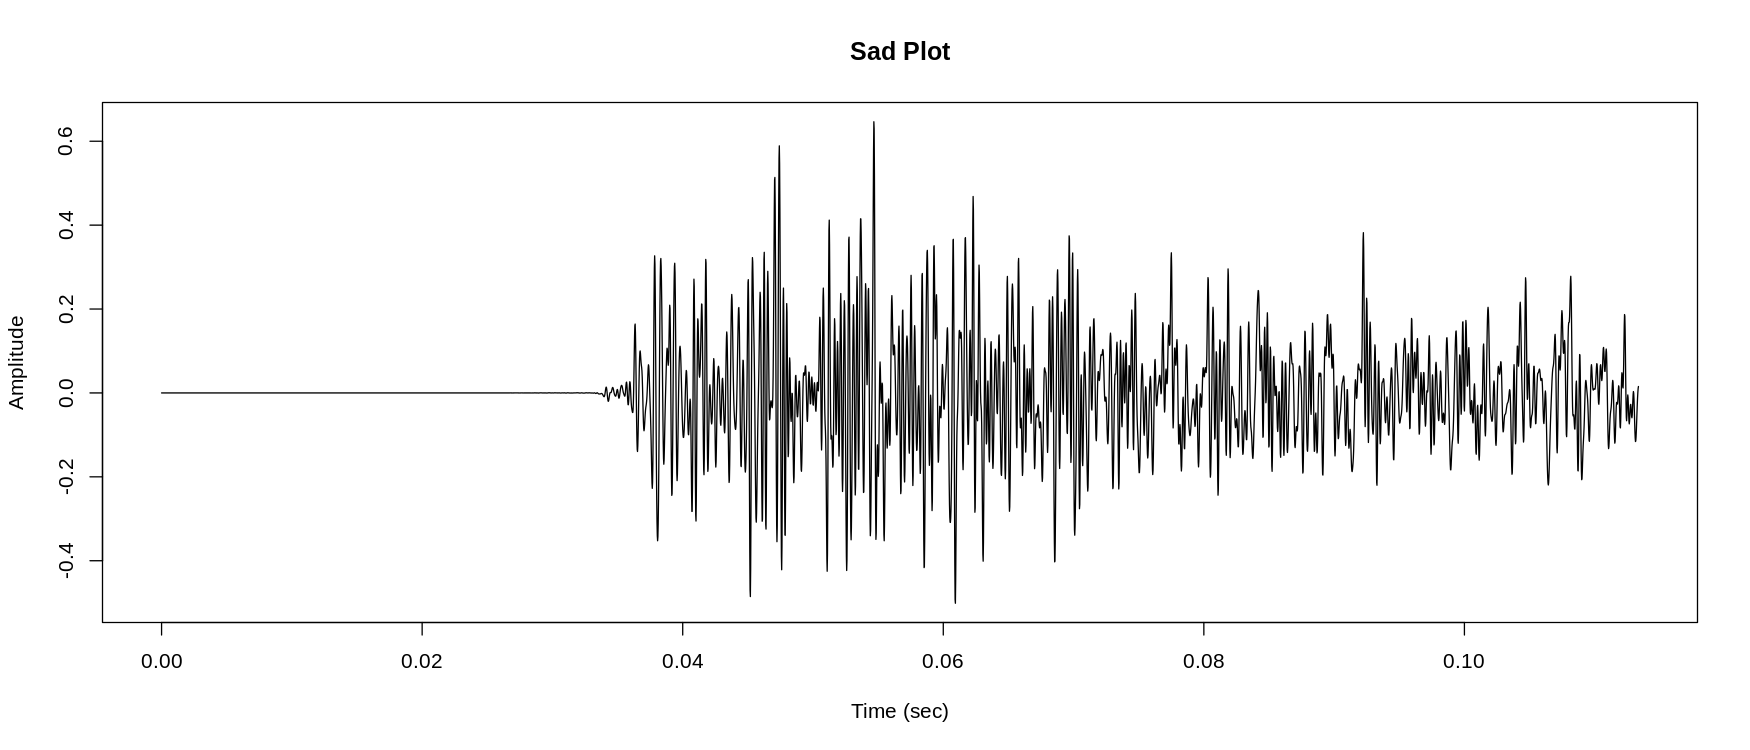

In [55]:
# Plotting some samples– far too many to do them all
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(sad_time[1:5000], m1[1:5000], type='l', col='black', 
     xlab='Time (sec)', ylab='Amplitude', main='Sad Plot')

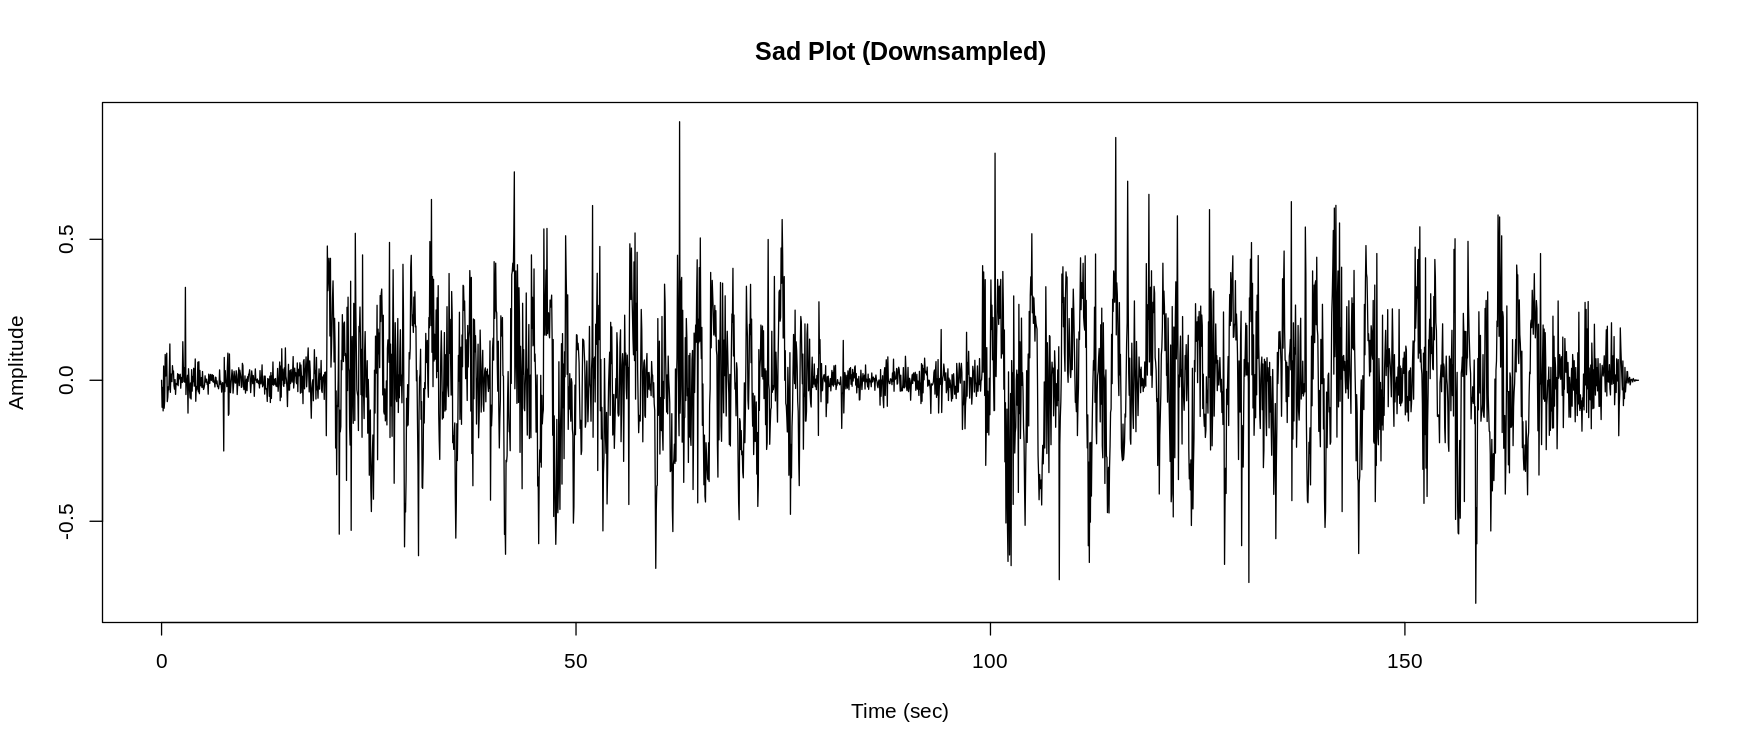

In [56]:
# Downsampling
sad.indx <- seq(1, (sad_samples - 1), 2756)
options(repr.plot.width=14, repr.plot.height=6, repr.plot.res = 125)
plot(sad_time[sad.indx], m1[sad.indx], type='l', col='black', 
     xlab='Time (sec)', ylab='Amplitude', main='Sad Plot (Downsampled)')

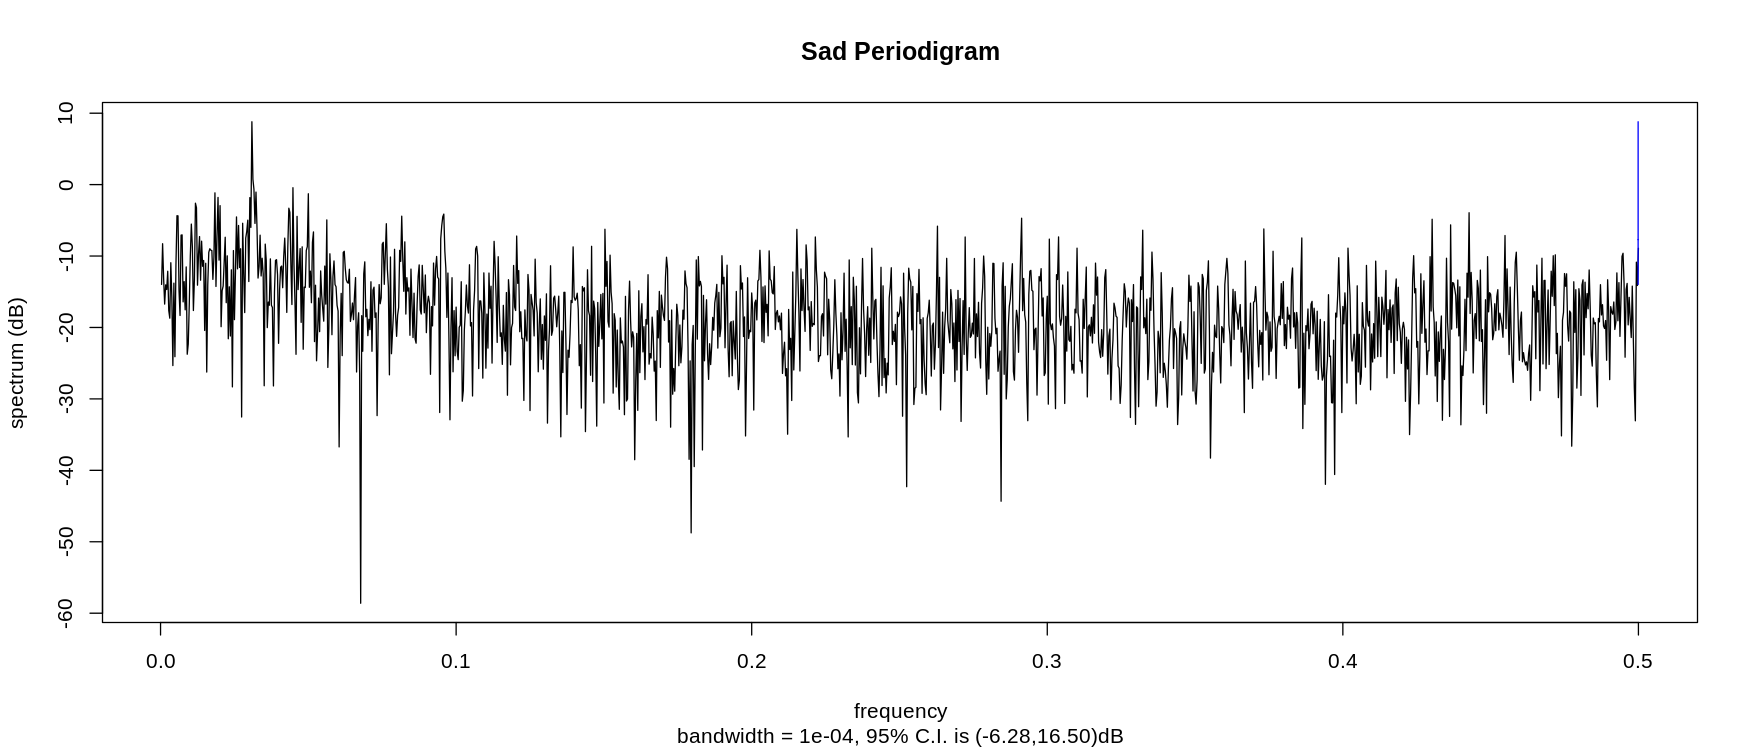

In [57]:
spectrum(m1[sad.indx], log="dB", main="Sad Periodigram")

## Conclusions and Discussion

The methods used here are fairly straightforward to break down and visualize the audio. In a more in-depth project, I would use several songs for each mood/feeling as well as having more of these categories. That being said, we can still examine these songs for similarities and differences.

My first observation is that the plot for the happy song seems to oscilate much more than the plot for the sad song. I think this is because of the more cyclical nature of the happy song, as it has a steady beat while the sad song has notes that are more spaced out and dragging. The downsampled versions of the plots are very interesting, as it seems as though the happy plot is very steady and consistent whereas the sad plot has two distinct groups. This supports the observations from the main plot, as the high amplitudes in the sad song are more spaced out while the happy song is more constant. The periodigrams are fairly similar for both, although the periodigram for the happy song seems to be trending slightly upward while the periodigram for the sad song seems to be trending slightly downward.

As I mentioned in the Introduction, I think an interesting application for this project would be an algorithm that can identify and label moods and feelings for songs by examining the physical waves that we see here. If I were to implement something like this, I would start with the fluctuations between areas peak amplitudes in different parts of the song, as that seems to be the major difference between the happy and sad songs examined here (the sad song has areas in the plot of lower amplitudes and areas of higher amplitudes, whereas the happy song's plot has much more consistent amplitudes).

## "Podcast"

The audio description for this assignment: https://github.com/julianlhayes/example/blob/master/Hayes_Final_Podcast.m4a


## Sources

Fabry, M. (2018, May 1).*What Was the First Sound Ever Recorded by a Machine?* Time. https://time.com/5084599/first-recorded-sound/







DJ T Huff. (2018). Sad [Song]. Independent. (from https://soundcloud.com/tmhproductions-374895840/sad)

Peterson, T. (2015, April 16). *Spotif To Use Playlists As Proxy For Targeting Ads To Activities, Moods*. Adage. https://adage.com/article/digital/spotify-playlists-gauge-moods-ad-targeting/298066

WM Music. (2021).Childrens Picnic [Song]. Free Music. (from https://soundcloud.com/fm_freemusic/childrens-picnic-cheerful-and-happy-childrens-song-free-download)